## Setup

Very good tutorial for LSTM in Tensorflow: https://www.tensorflow.org/tutorials/structured_data/time_series

We are going to use the FRED-MD (Monthly) data set, available here: https://research.stlouisfed.org/econ/mccracken/fred-databases/

In [ ]:
import itertools
import os
import datetime

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf

In [ ]:
plot_params = {'legend.fontsize': 20,
               'figure.figsize': (20, 10),
               'axes.labelsize':  15,
               'axes.titlesize':  30,
               'xtick.labelsize': 15,
               'ytick.labelsize': 15,
               'figure.dpi': 300}

plt.style.use('seaborn-v0_8')

#plt.rcParams.update(plot_params)

color_dark_blue = [1/255, 62/255, 125/255]
color_light_blue = [6/255, 143/255, 203/255]
purple = [102/255, 51/255, 153/255]

colors = [color_dark_blue, color_light_blue, purple]

color_line = list(itertools.product(['-', ':', '--', ':' '-', ':'], colors))

In [ ]:
df = pd.read_csv('current.csv', index_col=0)

In [ ]:
df

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
Transform:,5.000,5.0,5.000,5.000000e+00,5.00000,5.0000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.00,6.00,6.0000,1.0000
1/1/1959,2583.560,2426.0,15.188,2.766768e+05,18235.77392,21.9665,23.3891,22.2688,31.7011,19.0149,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.00,12298.00,84.2043,NaN
2/1/1959,2593.596,2434.8,15.346,2.787140e+05,18369.56308,22.3966,23.7048,22.4617,31.9337,19.1147,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.00,12298.00,83.5280,NaN
3/1/1959,2610.396,2452.7,15.491,2.777753e+05,18523.05762,22.7193,23.8483,22.5719,31.9337,19.4890,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.00,12349.00,81.6405,NaN
4/1/1959,2627.446,2470.0,15.435,2.833627e+05,18534.46600,23.2032,24.1927,22.9026,32.4374,19.6138,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.00,12484.00,81.8099,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/1/2023,19030.119,15600.2,115.246,1.475174e+06,684636.00000,103.1512,101.7953,102.4512,103.6775,108.3925,...,118.685,122.165,29.23,33.90,26.04,63.7,477413.30,885270.58,5243.7520,17.4930
5/1/2023,19074.384,15636.1,115.400,1.489005e+06,689158.00000,102.8498,101.3637,101.9376,102.9511,109.2537,...,118.279,122.441,29.33,33.97,26.15,59.0,483082.33,889095.91,5210.2067,17.3964
6/1/2023,19082.740,15654.8,115.693,1.488903e+06,690518.00000,102.2924,100.5411,100.8521,101.3834,105.4454,...,118.369,122.797,29.52,34.04,26.40,64.2,492904.98,902738.96,5188.5907,14.0327


In [ ]:
df = pd.read_csv('current.csv', index_col=0).dropna(axis=1).drop('Transform:').dropna(axis=0)
df.index = pd.DatetimeIndex(df.index).to_period('M')

In [ ]:
prediction_columns = 'GS10'

In [ ]:
df_rate = df[['GS1', 'GS5', 'GS10']]

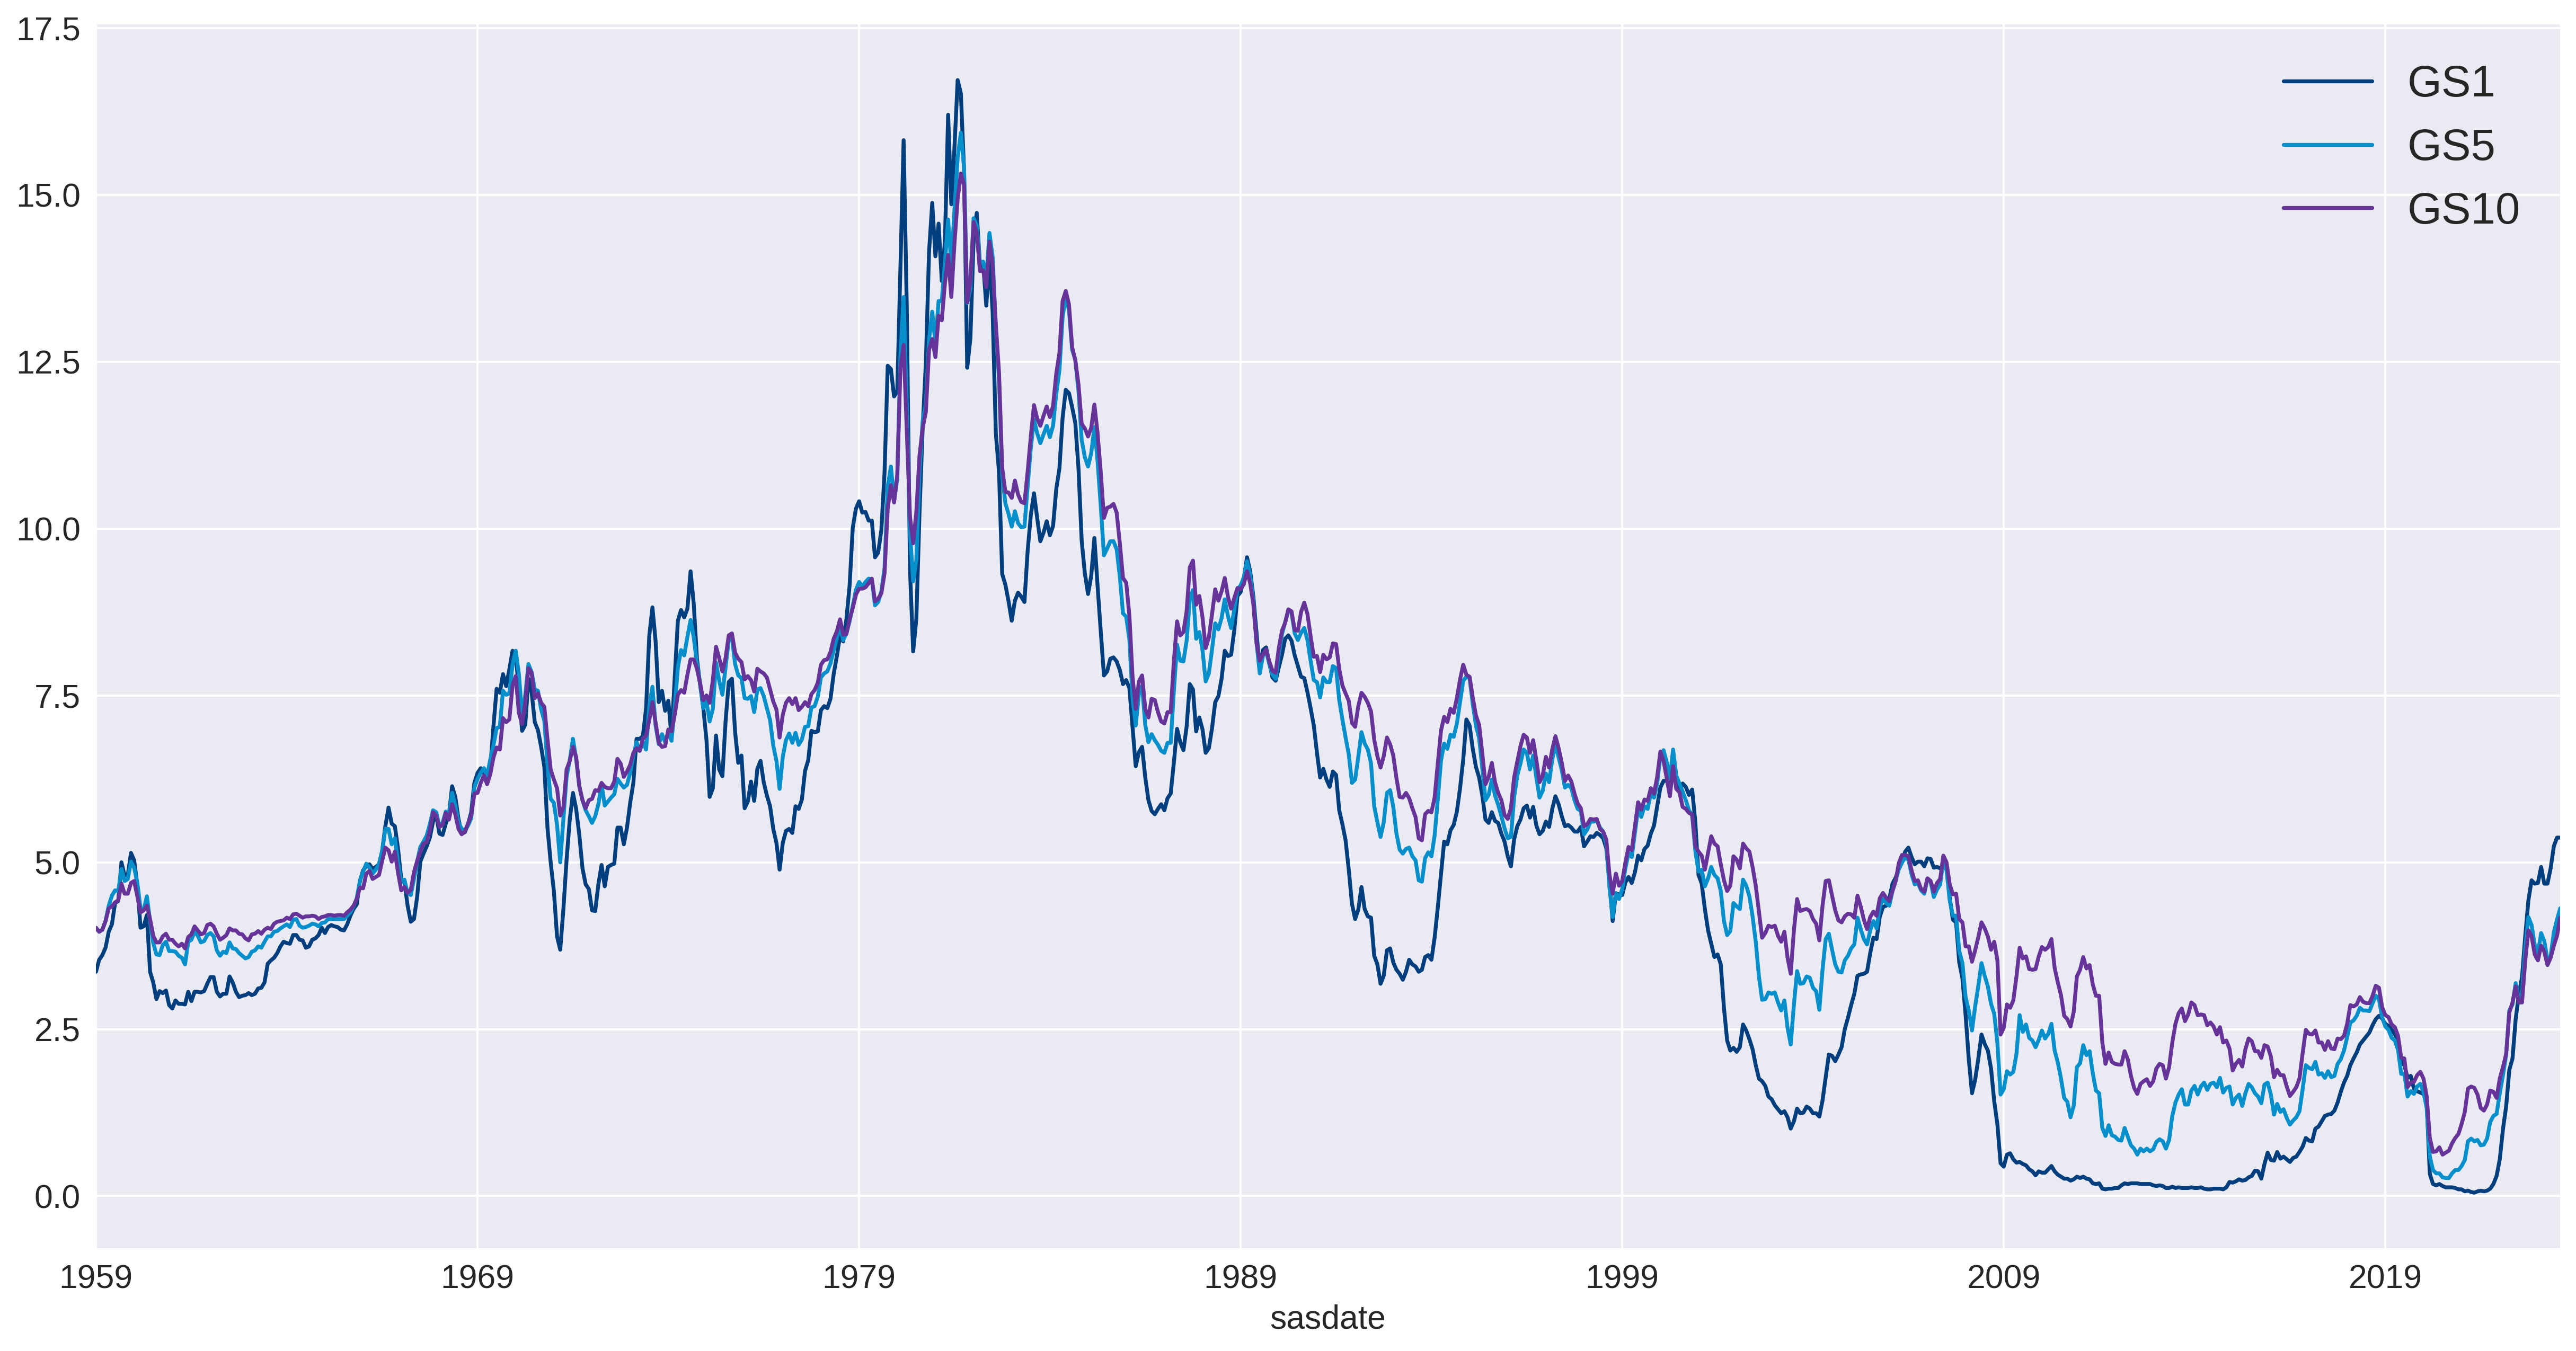

In [ ]:
with plt.rc_context(plot_params):
    df_rate.plot(color=colors)

In [ ]:
#df[prediction_columns] = np.log(df[prediction_columns]).diff().diff()
df[prediction_columns] = df[prediction_columns].diff()
df = df.dropna()

#df_NS = df_NS[prediction_columns].to_frame()

## Train-Validation-Test and Normalizing

In [ ]:
df = df[['GS1', 'GS5', 'GS10']]
df = df.diff().dropna()

In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.8)]
val_df = df[int(n*0.8):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [ ]:
print(train_df.shape,
val_df.shape,
test_df.shape)

(620, 3) (77, 3) (78, 3)


In [ ]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

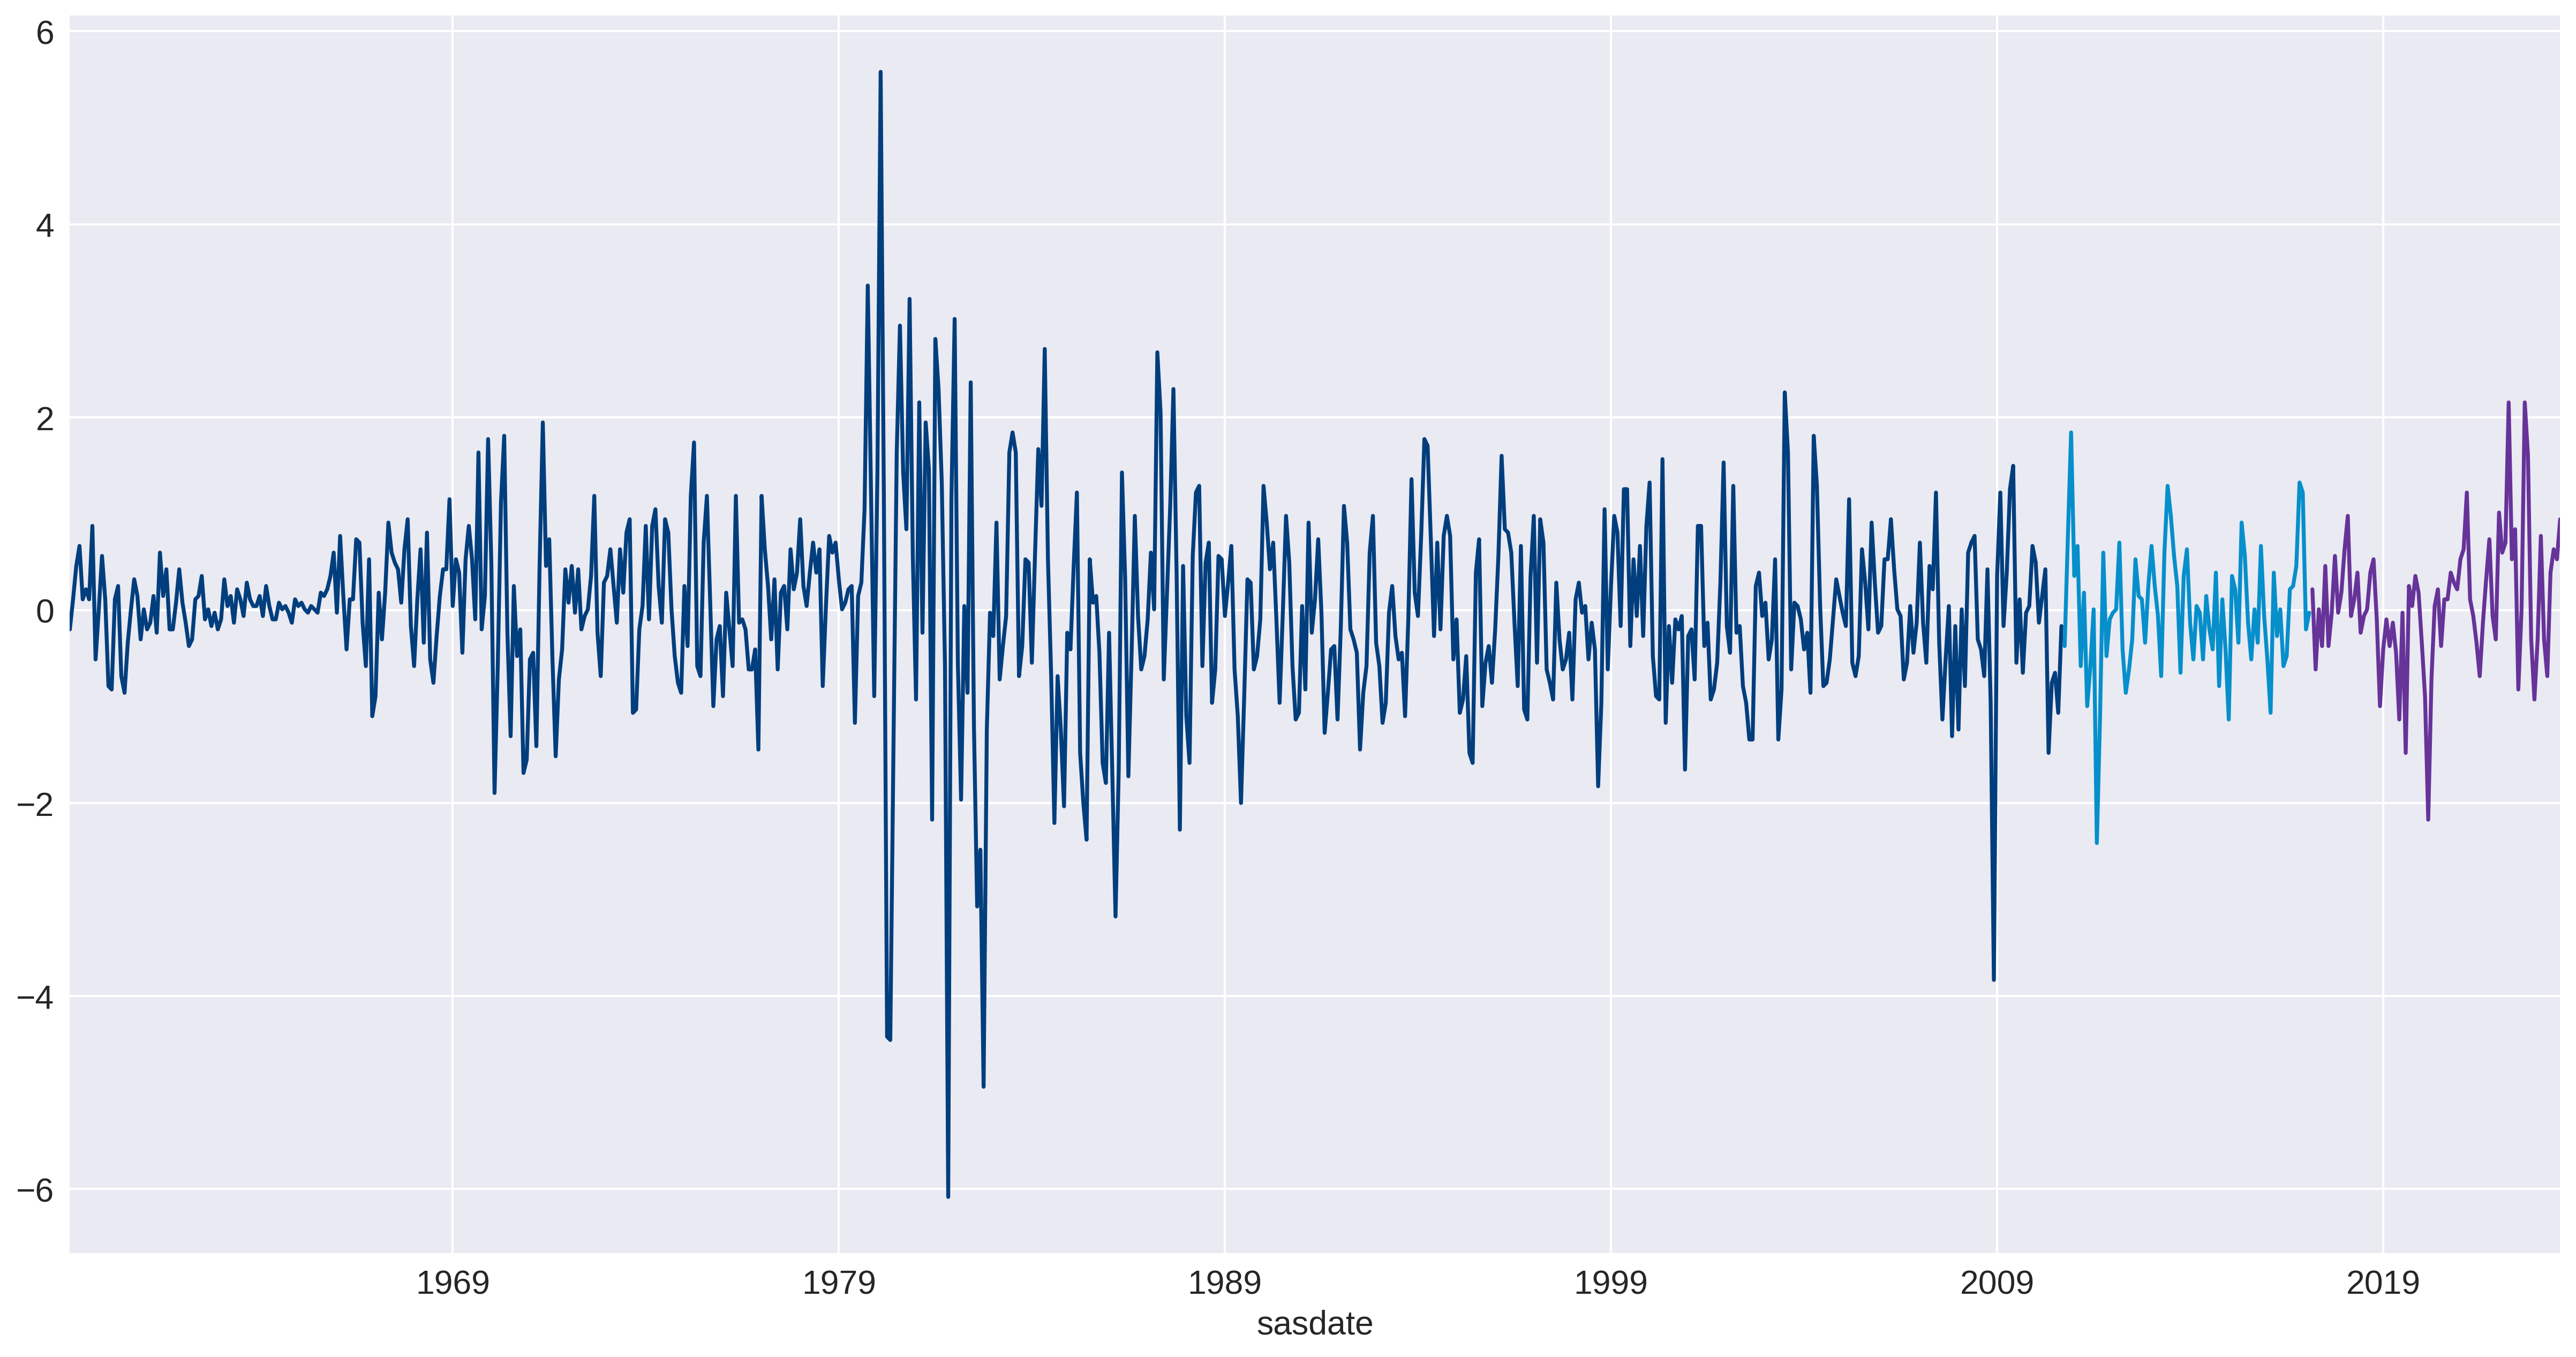

In [ ]:
with plt.rc_context(plot_params):
    train_df[prediction_columns].plot(color=color_dark_blue)
    val_df[prediction_columns].plot(color=color_light_blue)
    test_df[prediction_columns].plot(color=purple)

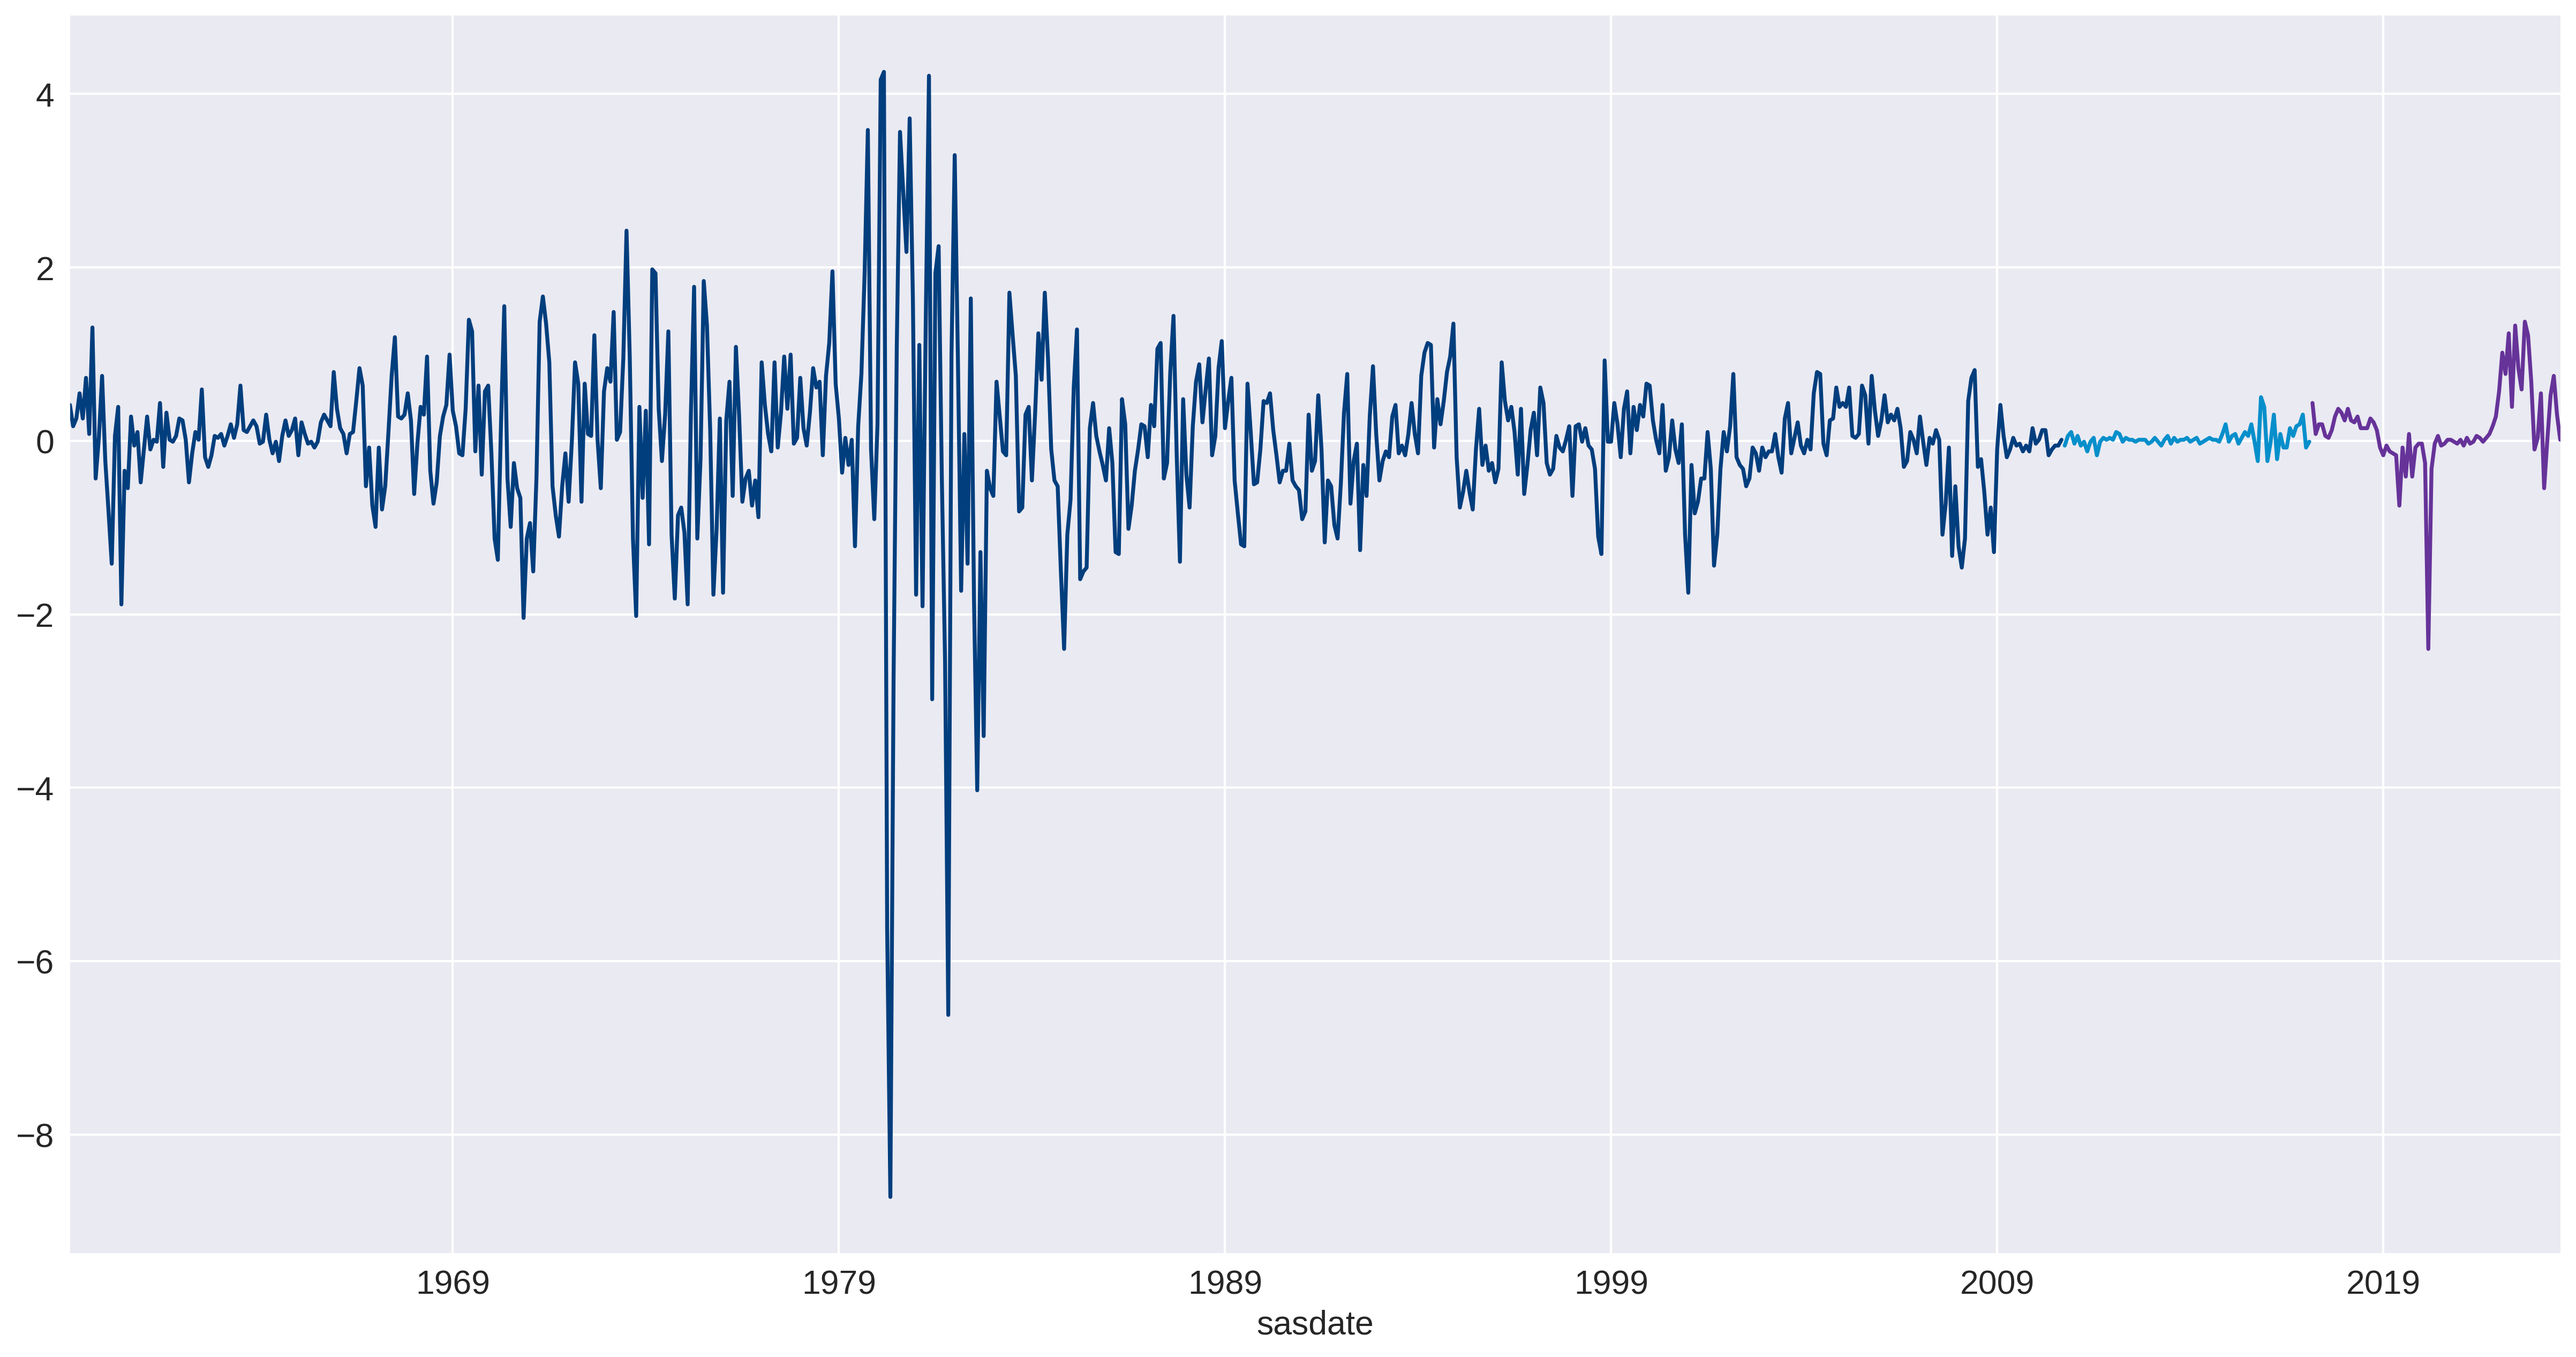

In [ ]:
with plt.rc_context(plot_params):
    train_df['GS1'].plot(color=color_dark_blue)
    val_df['GS1'].plot(color=color_light_blue)
    test_df['GS1'].plot(color=purple)

## Data windowing


In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
w0 = WindowGenerator(input_width=12, label_width=1, shift=12,
                     label_columns=[prediction_columns])
w0

Total window size: 24
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [23]
Label column name(s): ['GS10']

In [ ]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=[prediction_columns])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['GS10']

In [ ]:
w1 = WindowGenerator(input_width=12, label_width=1, shift=1,
                     label_columns=[prediction_columns])
w1

Total window size: 13
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [12]
Label column name(s): ['GS10']

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
def plot(self, model=None, plot_col=prediction_columns, max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [days]')

WindowGenerator.plot = plot

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
# Each element is an (inputs, label) pair.
w1.train.element_spec

(TensorSpec(shape=(None, 12, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [ ]:
for example_inputs, example_labels in w1.train.take(2):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 12, 3)
Labels shape (batch, time, features): (32, 1, 1)
Inputs shape (batch, time, features): (32, 12, 3)
Labels shape (batch, time, features): (32, 1, 1)


In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1, label_columns=[prediction_columns])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['GS10']

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(2):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 3)
Labels shape (batch, time, features): (32, 1, 1)
Inputs shape (batch, time, features): (32, 1, 3)
Labels shape (batch, time, features): (32, 1, 1)


In [ ]:
MAX_EPOCHS = 120

def compile_and_fit(model, window, patience=2, max_epochs=MAX_EPOCHS):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=patience,
                                                      mode='min')

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=max_epochs,
                        validation_data=window.val,
                        callbacks=[early_stopping])
    return history

## Baseline - Random Walk

In [ ]:
val_performance = {}
performance = {}

In [ ]:
class BaselineZero(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result =  0.0 * inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result =  inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
baseline = BaselineZero(label_index=single_step_window.column_indices[prediction_columns])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance['Baseline Zero'] = baseline.evaluate(single_step_window.val)
performance['Baseline Zero'] = baseline.evaluate(single_step_window.test, verbose=0)

3/3 [==============================] - 1s 7ms/step - loss: 0.4283 - mean_absolute_error: 0.4974


In [ ]:
baseline = Baseline(label_index=single_step_window.column_indices[prediction_columns])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

3/3 [==============================] - 0s 5ms/step - loss: 1.2165 - mean_absolute_error: 0.8796


In [ ]:
wide_window = WindowGenerator(
    input_width=12, label_width=12, shift=1, label_columns=[prediction_columns])

wide_window

Total window size: 13
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Label column name(s): ['GS10']

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 12, 3)
Output shape: (32, 12, 1)


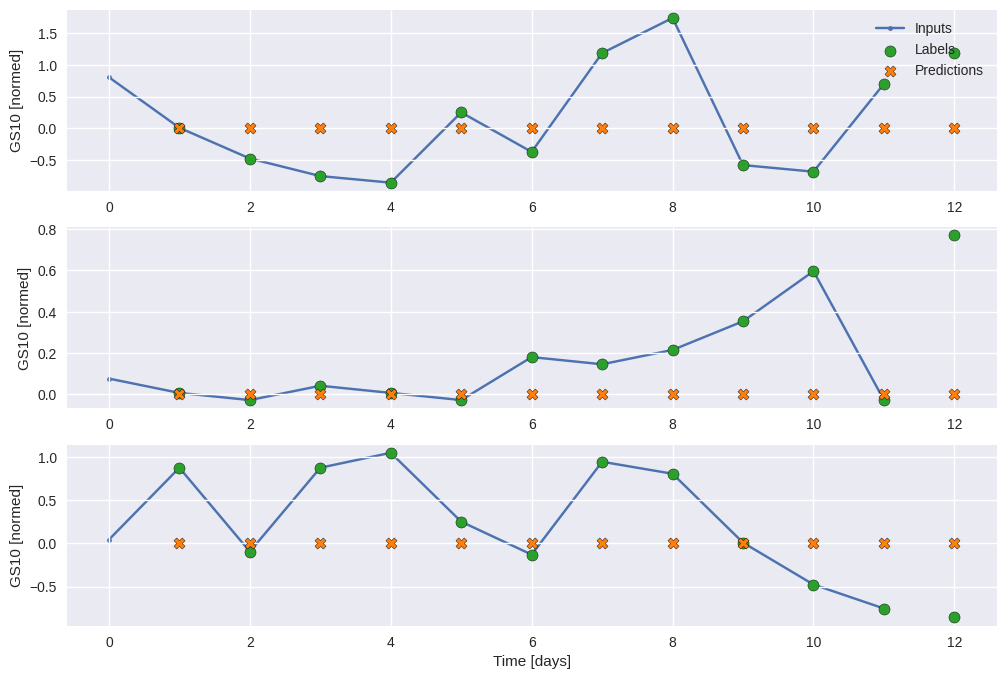

In [ ]:
wide_window.plot(baseline)

## Feed-Forward NN

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/120
20/20 [==============================] - 5s 15ms/step - loss: 0.9448 - mean_absolute_error: 0.6715 - val_loss: 0.4130 - val_mean_absolute_error: 0.5106
Epoch 2/120
20/20 [==============================] - 0s 7ms/step - loss: 0.9081 - mean_absolute_error: 0.6654 - val_loss: 0.4117 - val_mean_absolute_error: 0.5091
Epoch 3/120
20/20 [==============================] - 0s 9ms/step - loss: 0.9102 - mean_absolute_error: 0.6615 - val_loss: 0.4189 - val_mean_absolute_error: 0.5135
Epoch 4/120
3/3 [==============================] - 0s 5ms/step - loss: 0.4123 - mean_absolute_error: 0.5100


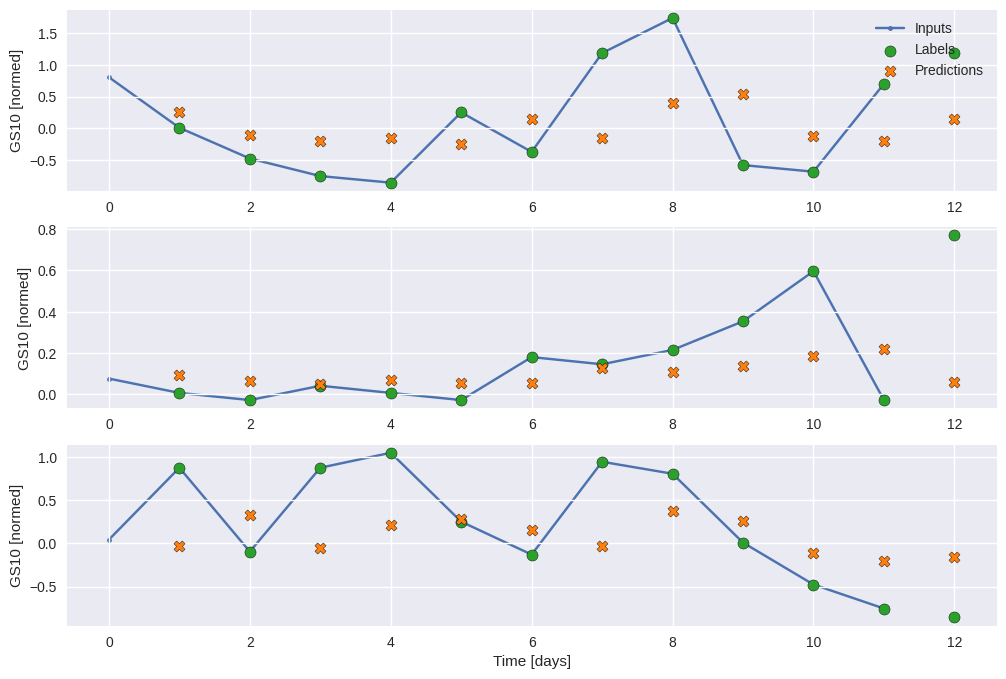

In [ ]:
wide_window.plot(dense)

## LSTM

In [ ]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(10, return_sequences=True, dropout=0.2),
    tf.keras.layers.Dense(units=1)
])

In [ ]:
# lstm_model = tf.keras.models.Sequential([
#     tf.keras.layers.LSTM(64, activation='tanh', return_sequences=True),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.LSTM(32, activation='tanh', return_sequences=True),
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(1, activation='linear')])

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 12, 3)
Output shape: (32, 12, 1)


In [ ]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 10)            560       
                                                                 
 dense_3 (Dense)             (None, 12, 1)             11        
                                                                 
Total params: 571 (2.23 KB)
Trainable params: 571 (2.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = compile_and_fit(lstm_model, w1)

val_performance['LSTM'] = lstm_model.evaluate(w1.val)
performance['LSTM'] = lstm_model.evaluate(w1.test, verbose=0)

Epoch 1/120
19/19 [==============================] - 3s 30ms/step - loss: 1.0340 - mean_absolute_error: 0.7052 - val_loss: 0.3084 - val_mean_absolute_error: 0.4476
Epoch 2/120
19/19 [==============================] - 0s 8ms/step - loss: 1.0240 - mean_absolute_error: 0.7012 - val_loss: 0.3054 - val_mean_absolute_error: 0.4451
Epoch 3/120
19/19 [==============================] - 0s 10ms/step - loss: 1.0241 - mean_absolute_error: 0.7017 - val_loss: 0.3037 - val_mean_absolute_error: 0.4433
Epoch 4/120
19/19 [==============================] - 0s 9ms/step - loss: 1.0244 - mean_absolute_error: 0.7002 - val_loss: 0.3020 - val_mean_absolute_error: 0.4418
Epoch 5/120
19/19 [==============================] - 0s 8ms/step - loss: 1.0172 - mean_absolute_error: 0.7000 - val_loss: 0.3012 - val_mean_absolute_error: 0.4408
Epoch 6/120
19/19 [==============================] - 0s 12ms/step - loss: 1.0156 - mean_absolute_error: 0.6986 - val_loss: 0.3008 - val_mean_absolute_error: 0.4402
Epoch 7/120
19/19 [

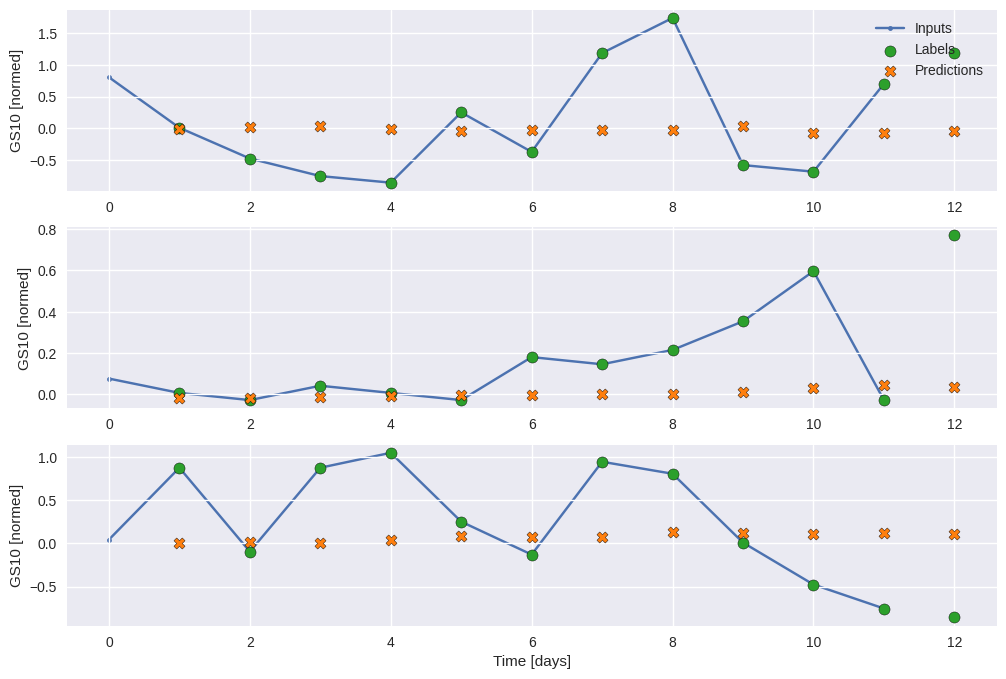

In [ ]:
wide_window.plot(lstm_model)

## Performance

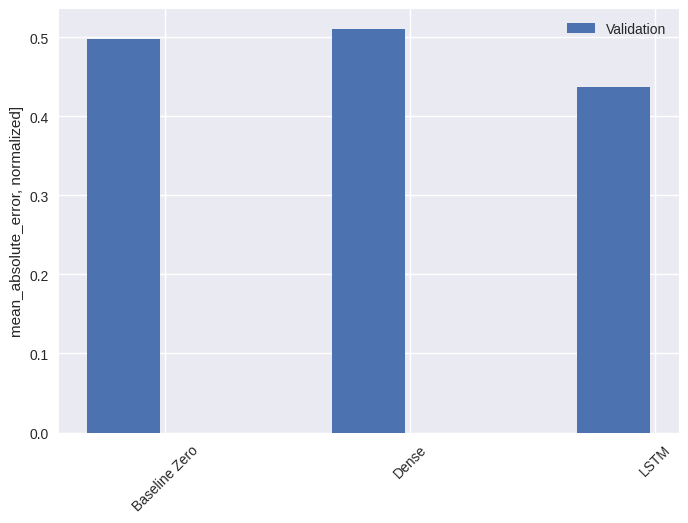

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
#test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
#plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

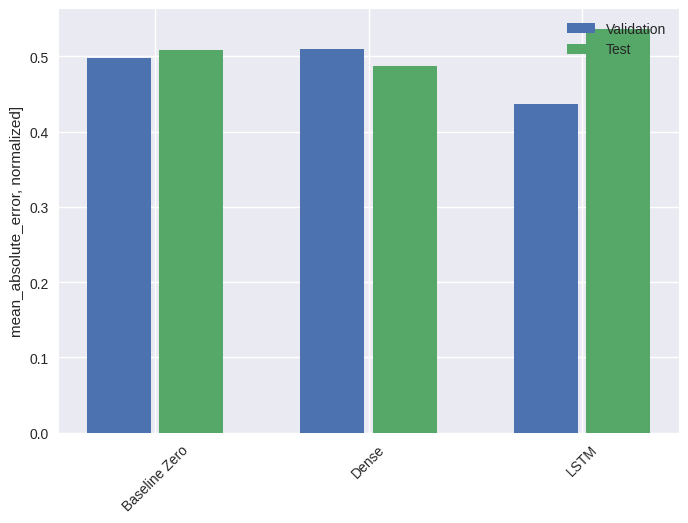

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()